# Essential Machine Learning for Physicists

<p align="right">
  <img src="../../misc/tum-logo.png" width="93" align="right" />
  <img src="../../misc/sixt-logo.png" width="70" align="right" /> 
<left><em>&copy; Zinonas Zinonos</em></left>
    
<left><em>For more information, visit <a href='https://github.com/zinon/essential-machine-learning-for-physicists'>essential-machine-learning-for-physicists</a></em></left>.
___
</p>

# KNN Exercise 1 - Tasks

## The Sonar Data - Detecting a Rock or a Mine

Sonar (sound navigation ranging) is a technique that uses sound propagation (usually underwater, as in submarine navigation) to navigate, communicate with or detect objects on or under the surface of the water, such as other vessels.

<img src=https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Miinitraaleri_%22Virsaitis%22_vrakk.jpg/1920px-Miinitraaleri_%22Virsaitis%22_vrakk.jpg width=500>

*Source:* https://en.wikipedia.org/wiki/Sonar


Sonar (sound navigation and ranging) is a technique based on the principle of reflection of ultrasonic sound waves. These waves propagate through water and reflect on hitting the ocean bed or any object obstructing its path.
Sonar has been widely used in submarine navigation, communication with or detection of objects on or under the water surface (like other vessels), hazard identification, etc.

There are two types of sonar technology used:
- passive (listening to the sound emitted by vessels in the ocean)
- active (emitting pulses and listening for their echoes).



## The dataset

Source: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

This dataset was used in Gorman, R. P., and Sejnowski, T. J. (1988). “Analysis of Hidden Units in a Layered Network Trained to Classify Sonar Targets” in Neural Networks, Vol. 1, pp. 75–89.

The data set contains the response metrics for 60 separate sonar frequencies sent out against a known mine field (and known rocks). 
So, these data correspond to sonar signals bounced off a metal cylinder (mines, `M`) and a roughly cylindrical rock (rock, `R`) at various angles and under various conditions.

Our main goal is to create a machine learning model capable of detecting the difference between a rock or a mine based on the response of the 60 separate sonar frequencies.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data

<span style="color:green">**TASK**</span>: Load the file called `sonar.csv` which is located in the `datasets/` folder.

In [2]:
# CODE
data = pd.read_csv(r"C:\Users\batvi\essential-machine-learning-for-physicists\datasets\sonar.csv")

<span style="color:green">**TASK**</span>: Show the top five rows of the dataframe.

In [3]:
# CODE
data.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [145]:
# KEEP ME

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


<span style="color:green">**TASK**</span>: Are there any null or nan entries?

In [4]:
# CODE
print("Yes" if data.isna().any().any() else "No")

No


In [146]:
# KEEP ME

No


In [5]:
data["Label"].unique()

array(['R', 'M'], dtype=object)

# Data Exploration

<span style="color:green">**TASK**</span>: Create a heatmap of the correlation between the difference frequency responses.

<Axes: >

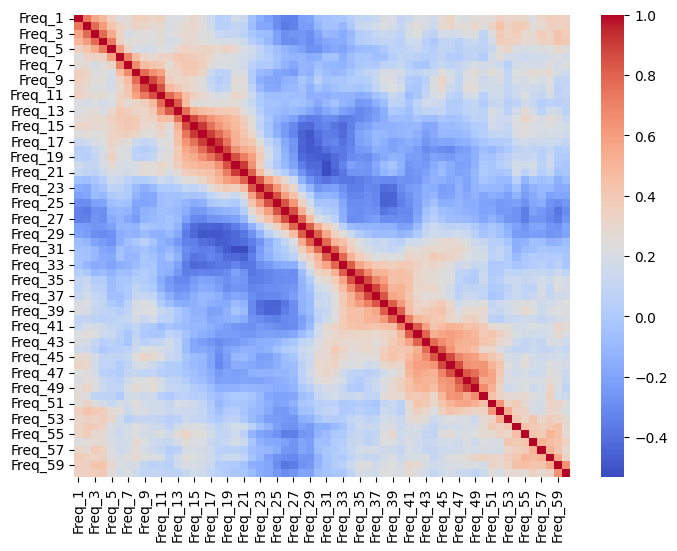

In [6]:
# CODE
fig, ax = plt.subplots(figsize = (8,6))
sns.heatmap(data.corr(numeric_only = True), cmap = 'coolwarm')

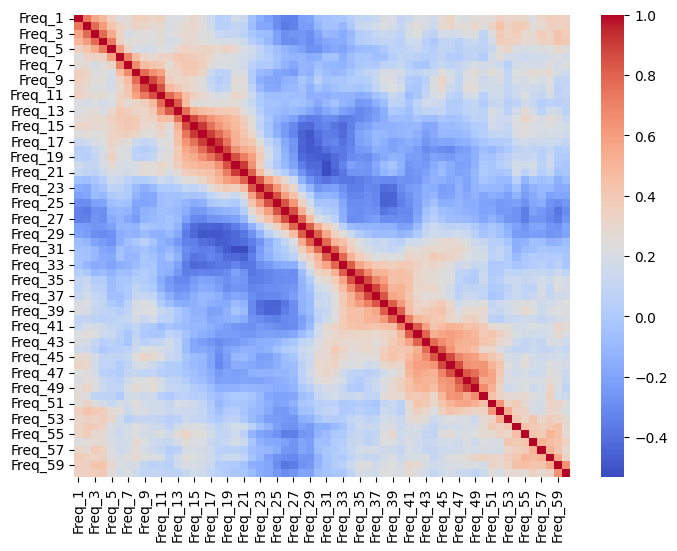

In [147]:
# KEEP ME

<span style="color:green">**TASK**</span>: What are the top 5 correlated frequencies with the target label?

**Note 1:** You many need to map the label to 0's and 1's.

**Note 2:** We are looking for absolute correlation values.

In [7]:
data['Target'] = data['Label'].map({'R':0, 'M':1})

In [8]:
# CODE
np.abs(data.corr(numeric_only = True)["Target"].sort_values(ascending = False).drop("Target").head())

Freq_11    0.432855
Freq_12    0.392245
Freq_49    0.351312
Freq_10    0.341142
Freq_45    0.339406
Name: Target, dtype: float64

In [149]:
# KEEP ME

Freq_11    0.432855
Freq_12    0.392245
Freq_49    0.351312
Freq_10    0.341142
Freq_45    0.339406
Name: Target, dtype: float64

<span style="color:green">**TASK**</span>: Show the distribution of the highest correlated feature. Overlay the distributions for the two classes.

<Axes: xlabel='Freq_11', ylabel='Count'>

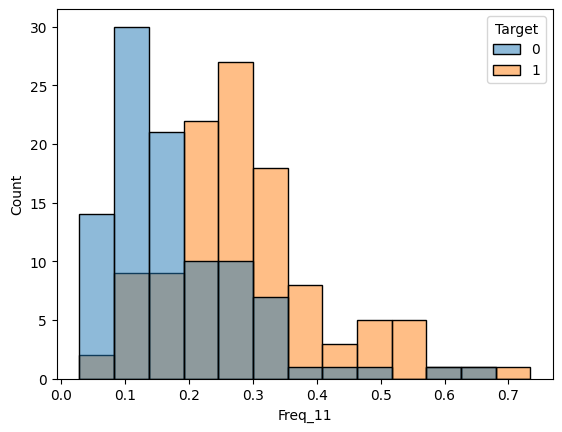

In [9]:
# CODE
sns.histplot(data = data, x = "Freq_11", hue = "Target")

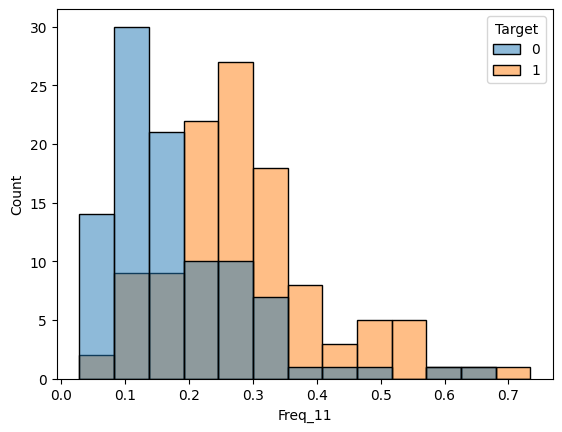

In [150]:
# KEEP ME

# Train & Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, 
and then judging our results on a final test set of 10% to evaluate our model.

<span style="color:green">**TASK**</span>: Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.

In [15]:
data.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label,Target
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R,0


In [18]:
# CODE
X = data.drop(["Target", "Label"], axis=1)
y = data["Label"]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)

# Pipeline

<span style="color:green">**TASK**</span>: Create a Pipeline that contains both a StandardScaler and a KNN model with default parameters.

In [22]:
# CODE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier()

In [24]:
scaler = StandardScaler()

In [28]:
steps = [("scaler",scaler), ("knn",knn)]

In [30]:
pipeline = Pipeline(steps = steps)
pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

In [161]:
# KEEP ME

Pipeline(steps=[('scaler', StandardScaler()), ('knn', KNeighborsClassifier())])

<span style="color:green">**TASK**</span>:  Perform a grid-search with the pipeline to test various values of $K$ and report back the best performing parameters. Also, add in your grid a scan over `weights` with possible values 'uniform' and 'distance'.

In [31]:
# CODE
from sklearn.model_selection import GridSearchCV

In [36]:
import os

In [39]:
K_values = list(range(1, 30))
param_grid = {'knn__n_neighbors': K_values, 'knn__weights':['uniform', 'distance']}
grid = GridSearchCV(estimator=pipeline,
                    param_grid=param_grid,
                    cv=5,
                    scoring='accuracy', 
                    n_jobs=os.cpu_count()-1)
grid.fit(X_train, y_train)

C:\Users\batvi\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2881: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=15,
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

In [167]:
# KEEP ME

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             n_jobs=7,
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29],
                         'knn__weights': ['uniform', 'distance']},
             scoring='accuracy')

<span style="color:green">**TASK**</span>: Report the best parameters of the grid search.

In [41]:
# CODE
grid.best_params_

{'knn__n_neighbors': 1, 'knn__weights': 'uniform'}

In [168]:
# KEEP ME

{'knn__n_neighbors': 1, 'knn__weights': 'uniform'}

<span style="color:green">**TASK**</span>: For strong solvers! Using the `.cv_results_` dictionary, create a plot of the mean test scores (or errors) per $K$ value and `weight` strategy.

In [89]:
# CODE
df_cv = pd.DataFrame(grid.cv_results_)
df_cv.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,param_knn__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.014463,0.000949,0.575985,0.003483,1,uniform,"{'knn__n_neighbors': 1, 'knn__weights': 'unifo...",0.90625,0.903226,0.774194,0.774194,0.838710,0.839315,0.058390,1
1,0.014192,0.000391,0.571642,0.004905,1,distance,"{'knn__n_neighbors': 1, 'knn__weights': 'dista...",0.90625,0.903226,0.774194,0.774194,0.838710,0.839315,0.058390,1
2,0.014212,0.000858,0.573427,0.001219,2,uniform,"{'knn__n_neighbors': 2, 'knn__weights': 'unifo...",0.84375,0.870968,0.741935,0.774194,0.806452,0.807460,0.046371,8
3,0.012890,0.002227,0.006450,0.000708,2,distance,"{'knn__n_neighbors': 2, 'knn__weights': 'dista...",0.90625,0.903226,0.774194,0.774194,0.838710,0.839315,0.058390,1
4,0.013117,0.001315,0.014304,0.001494,3,uniform,"{'knn__n_neighbors': 3, 'knn__weights': 'unifo...",0.90625,0.838710,0.774194,0.806452,0.838710,0.832863,0.043803,4


In [90]:
df_cv = pd.concat([df_cv, df_cv["params"].apply(pd.Series)], axis=1 )
df_cv["test_error"] = 1 - df_cv["mean_test_score"]
df_cv.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,param_knn__weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,knn__n_neighbors,knn__weights,test_error
0,0.014463,0.000949,0.575985,0.003483,1,uniform,"{'knn__n_neighbors': 1, 'knn__weights': 'unifo...",0.90625,0.903226,0.774194,0.774194,0.838710,0.839315,0.058390,1,1,uniform,0.160685
1,0.014192,0.000391,0.571642,0.004905,1,distance,"{'knn__n_neighbors': 1, 'knn__weights': 'dista...",0.90625,0.903226,0.774194,0.774194,0.838710,0.839315,0.058390,1,1,distance,0.160685
2,0.014212,0.000858,0.573427,0.001219,2,uniform,"{'knn__n_neighbors': 2, 'knn__weights': 'unifo...",0.84375,0.870968,0.741935,0.774194,0.806452,0.807460,0.046371,8,2,uniform,0.192540
3,0.012890,0.002227,0.006450,0.000708,2,distance,"{'knn__n_neighbors': 2, 'knn__weights': 'dista...",0.90625,0.903226,0.774194,0.774194,0.838710,0.839315,0.058390,1,2,distance,0.160685
4,0.013117,0.001315,0.014304,0.001494,3,uniform,"{'knn__n_neighbors': 3, 'knn__weights': 'unifo...",0.90625,0.838710,0.774194,0.806452,0.838710,0.832863,0.043803,4,3,uniform,0.167137


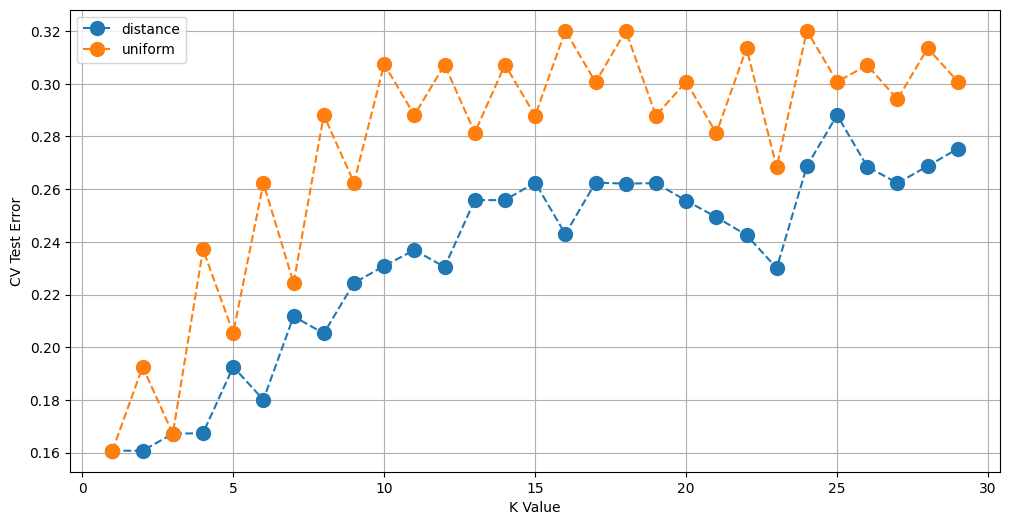

In [86]:
plt.figure(figsize=(12,6))
for group, idf in df_cv.groupby("knn__weights"):
    plt.plot(idf["knn__n_neighbors"], 
             idf["test_error"], 
             linestyle="dashed", marker="o", markersize=10, label=group)
plt.ylabel('CV Test Error')
plt.xlabel("K Value")
plt.legend()
plt.grid();

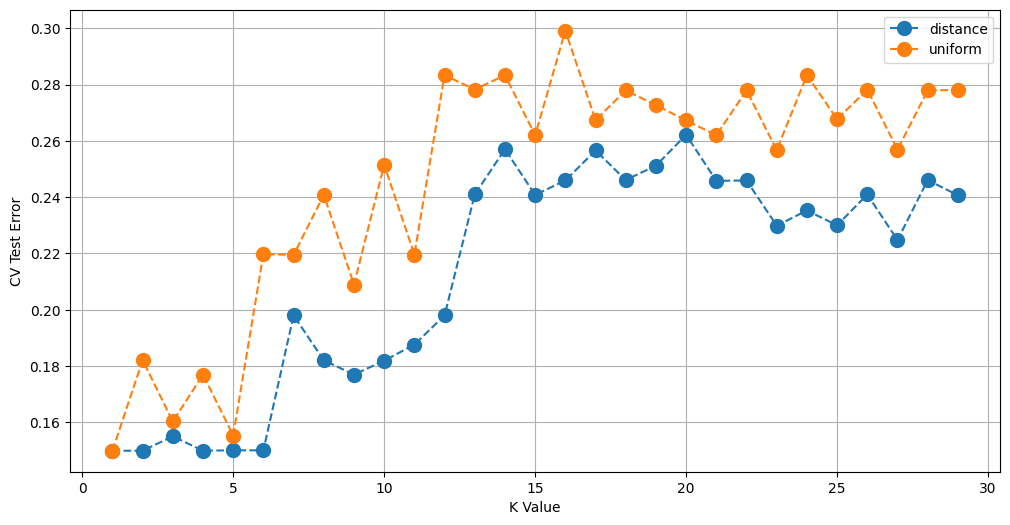

In [171]:
# KEEP ME

# Model Evaluation

<span style="color:green">**TASK**</span>:  Using the best hyper-parameters of the optimized classifier object from the previous step, build a new model. Then, get a final performance classification report.

In [91]:
# CODE
from sklearn.metrics import classification_report
best_knn = KNeighborsClassifier(n_neighbors=1, weights="uniform")
scaler = StandardScaler()

In [92]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [93]:
best_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=1)

In [181]:
# KEEP ME

KNeighborsClassifier(n_neighbors=1)

In [94]:
# CODE
y_test_pred = best_knn.predict(X_test_scaled)
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           M       0.90      0.96      0.93        28
           R       0.95      0.88      0.91        24

    accuracy                           0.92        52
   macro avg       0.93      0.92      0.92        52
weighted avg       0.93      0.92      0.92        52



In [183]:
# KEEP ME

              precision    recall  f1-score   support

           M       0.92      0.79      0.85        14
           R       0.67      0.86      0.75         7

    accuracy                           0.81        21
   macro avg       0.79      0.82      0.80        21
weighted avg       0.83      0.81      0.81        21



<span style="color:green">**TASK**</span>:  Using the best KNN classifier from the previous step, get a confusion matrix.

In [97]:
# CODE
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)

array([[27,  1],
       [ 3, 21]])

In [185]:
# KEEP ME

array([[11,  3],
       [ 1,  6]])

<span style="color:green">**TASK**</span>: Using the best KNN classifier from the previous step, report the accuracy score of the model on the test sample.

In [101]:
# CODE
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_test_pred)

0.9230769230769231

In [102]:
# KEEP ME

<span style="color:green">**TASK**</span>:  Using the best KNN classifier from the previous step, show a ROC curve.

In [128]:
# CODE - show the classes first
best_knn.classes_

array(['M', 'R'], dtype=object)

In [189]:
# KEEP ME

array(['M', 'R'], dtype=object)

In [106]:
# CODE - make predictions and then plot the roc curve
from sklearn.metrics import roc_auc_score, roc_curve

In [125]:
y_test_proba = best_knn.predict_proba(X_test_scaled)[:,0]
y_test_proba

array([1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0.])

In [126]:
y_test = y_test.replace({'R':0, 'M': 1})

Text(0.5, 1.0, 'ROC curve')

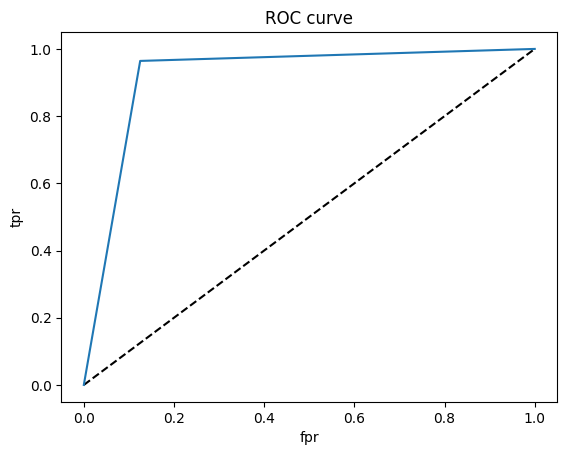

In [130]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr,tpr, label='KNN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')

Text(0.5, 1.0, 'ROC curve')

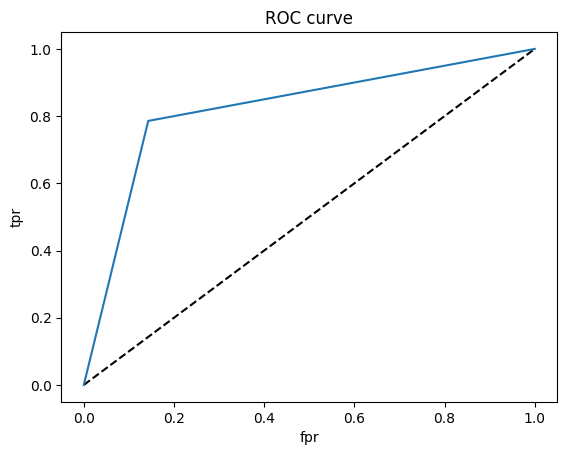

In [192]:
# KEEP ME

# Outstanding!